In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

# Import All Data

In [20]:
frames = []
frames.append(pd.read_csv("../split_datasets/train.csv"))
frames.append(pd.read_csv("../split_datasets/val.csv"))
frames.append(pd.read_csv("../split_datasets/test.csv"))
full_df = pd.concat(frames, sort=False)
full_df = full_df.reset_index(drop=True)

mean_std = pd.read_csv("../data_processing/mean_std.csv", index_col=0)

In [21]:
mean_std

,mean,std
price,120.097102,68.198942
latitude,43.677492,0.046110
longitude,-79.398326,0.059359
property_type,2.819879,1.844364
room_type,0.340686,0.495957
accommodates,3.053679,1.762132
bathrooms,1.200374,0.459320
bedrooms,1.270343,0.765102
beds,1.625366,0.961066
cancellation_policy,7.400940,5.685699


# Visualize One Sample 

In [17]:
pd.set_option('display.max_rows', 500)
full_df.head(1).transpose()

,0
id,8031392
last_scraped,2019-06-05
host_is_superhost,0
latitude,-0.396491
longitude,0.215068
property_type,-0.444532
room_type,-0.686927
accommodates,-0.597957
bathrooms,-0.436242
bedrooms,-0.353343


# Unstandardize Data

In [25]:
for i in mean_std.index:
    full_df[i] = full_df[i]*mean_std["std"][i] + mean_std["mean"][i]

In [29]:
for i in ["property_type", "facilities_count", "house_rules_count"]:
    full_df[i] = full_df[i].round()

# Map of Prices

In [34]:
print(full_df["latitude"].describe())
print(full_df["longitude"].describe())

count    209615.000000
mean         43.677492
std           0.046110
min          43.586710
25%          43.644730
50%          43.661217
75%          43.689460
max          43.847487
Name: latitude, dtype: float64
count    209615.000000
mean        -79.398326
std           0.059359
min         -79.632630
25%         -79.424340
50%         -79.397650
75%         -79.378841
max         -79.123400
Name: longitude, dtype: float64


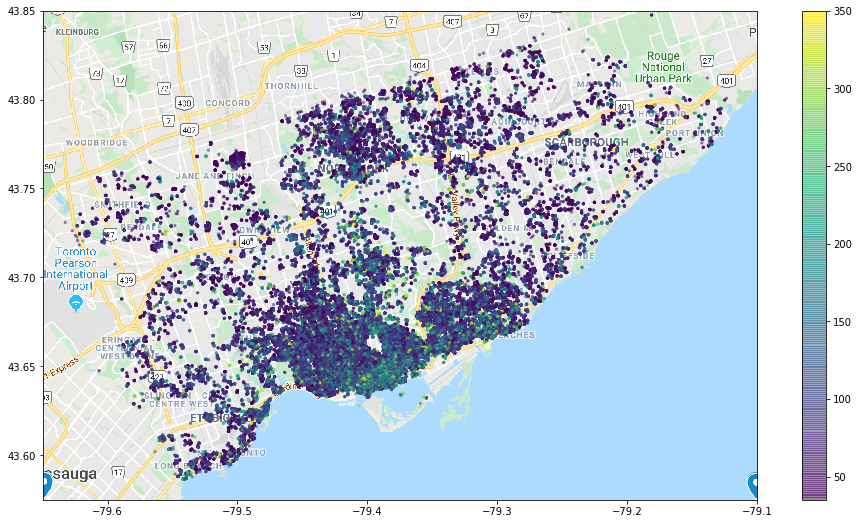

In [171]:
BBox = [-79.650, -79.100, 43.575, 43.850] # define longitude/latitude bounding box
toronto_map = plt.imread('map.png') # load image of toronto map

fig, ax = plt.subplots(figsize=(16, 9)) # create plot
im = ax.scatter(full_df["longitude"], full_df["latitude"], alpha=0.5, c=full_df["price"], s=5) # scatter plot
fig.colorbar(im, ax=ax) # create colour bar of price

ax.set_xlim(BBox[0], BBox[1]) # set latitude bounds
ax.set_ylim(BBox[2], BBox[3]) # set longitude bounds

ax.imshow(toronto_map, zorder=0, extent=BBox, aspect='auto') #show plot

In [172]:
fig.savefig("price_map2.png", dpi=300)

# Histogram of Prices

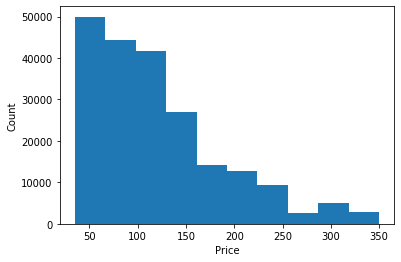

In [113]:
plt.hist(full_df["price"], bins=10)
plt.xlabel("Price")
plt.ylabel("Count")
plt.savefig("price_dist.png")

# Map of Property Types

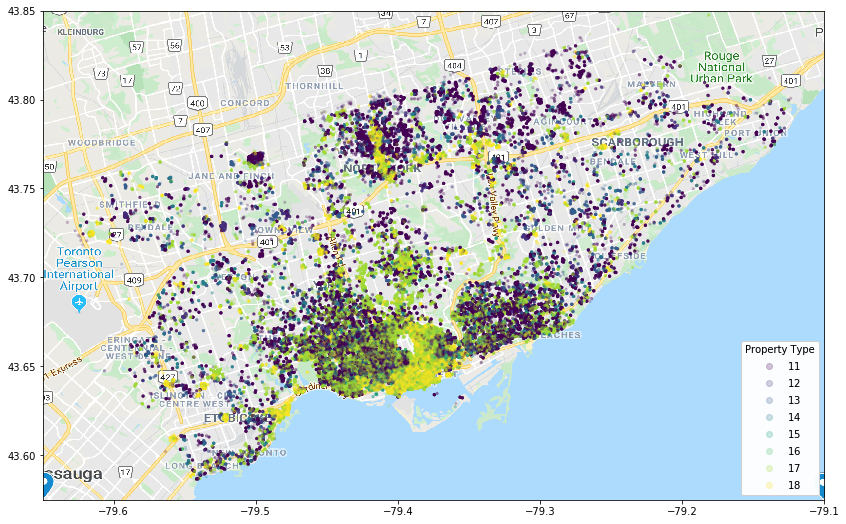

In [179]:
BBox = [-79.650, -79.100, 43.575, 43.850] # define longitude/latitude bounding box
toronto_map = plt.imread('map.png') # load image of toronto map

fig, ax = plt.subplots(figsize=(14, 9)) # create plot

property_types = {
    1:11, #house
    3:12, #townhouse
    0:13, #bungalow
    7:14, #guest suite
    4:15, # loft
    6:16, # serv apt
    2:17, # apart
    5:18, #condo
    
}

types = full_df["property_type"].apply(lambda x: property_types[x])

im = ax.scatter(full_df["longitude"], full_df["latitude"], alpha=0.2, c=types, s=5) # scatter plot
legend1 = ax.legend(*im.legend_elements(), loc="lower right", title="Property Type")
ax.add_artist(legend1)

ax.set_xlim(BBox[0], BBox[1]) # set latitude bounds
ax.set_ylim(BBox[2], BBox[3]) # set longitude bounds

ax.imshow(toronto_map, zorder=0, extent=BBox, aspect='auto') #show plot

In [180]:
fig.savefig("property_map.png", dpi=300)

dict_items([(0, '#882255'), (1, '#332288'), (2, '#88CCEE'), (3, '#44AA99'), (4, '#117733'), (5, '#999933'), (6, '#DDCC77'), (7, '#CC6677')])

In [159]:
im.legend_elements()

([<matplotlib.lines.Line2D at 0x1a6379908>,
 ['$\\mathdefault{0}$',
  '$\\mathdefault{1}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{3}$',
  '$\\mathdefault{4}$',
  '$\\mathdefault{5}$',
  '$\\mathdefault{6}$',
  '$\\mathdefault{7}$'])